In [4]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

In [5]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head(
    10
)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN
5,NaN,1959-03-01,NaN,Cape Canaveral,NaN,NaN,78.0,0.0,60.92,NaN,...,10.0,10.0,NaN,NaN,NaN,30.13,NaN,11:35:00,Cloudy,NaN
6,NaN,1959-03-02,NaN,Cape Canaveral,NaN,NaN,82.0,0.0,65.12,NaN,...,13.0,10.0,NaN,NaN,NaN,30.19,NaN,11:37:00,Partly Cloudy,NaN
7,Pioneer 4,1959-03-03,13:10:00,Cape Canaveral,Uncrewed,Y,78.0,0.0,69.65,78.0,...,20.0,7.0,12.0,NaN,NaN,30.13,NaN,11:38:00,Cloudy,NaN
8,NaN,1959-03-04,NaN,Cape Canaveral,NaN,NaN,77.0,0.0,66.72,NaN,...,21.0,7.0,NaN,NaN,NaN,30.11,NaN,11:40:00,Cloudy,NaN
9,NaN,1959-03-05,NaN,Cape Canaveral,NaN,NaN,81.0,67.0,72.63,NaN,...,17.0,10.0,NaN,NaN,NaN,30.12,NaN,11:42:00,Cloudy,NaN


In [6]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [7]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [8]:
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [9]:
label_encoder = preprocessing.LabelEncoder()

launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


In [10]:
from datetime import datetime
launches = launch_data[launch_data['Launched?'] == 'Y'][['Date','Crewed or Uncrewed','Condition']]
launches['month'] =  pd.DatetimeIndex(launches['Date']).month
#launched['year'] = pd.DatetimeIndex(launched['Date']).year


launched = launches[['month','Date']].groupby(['month']).count().rename(columns={'Date':'no of launches'})
launched

,no of launches
month,
1,6
2,5
3,5
4,5
5,5
6,2
7,4
8,7
9,5


In [11]:
launches

,Date,Crewed or Uncrewed,Condition,month
2,1958-12-06,1,0,12
7,1959-03-03,1,0,3
12,1961-08-23,1,6,8
17,1961-11-18,1,1,11
22,1962-01-26,1,1,1
27,1962-04-23,1,0,4
32,1962-10-18,1,0,10
37,1964-01-30,1,1,1
42,1964-07-28,1,0,7
47,1965-02-17,1,6,2


[]

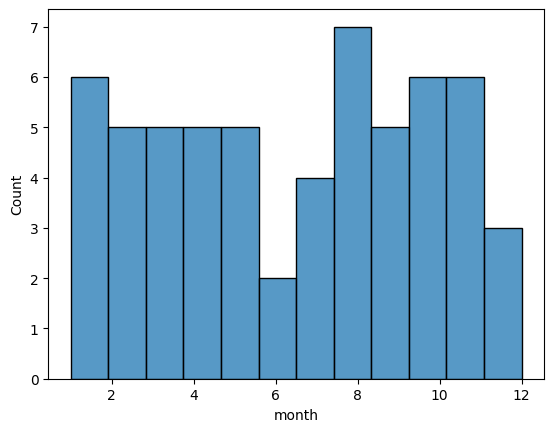

In [12]:
import seaborn 

plt = seaborn.histplot(launches['month'],bins=12)
plt.plot()


[]

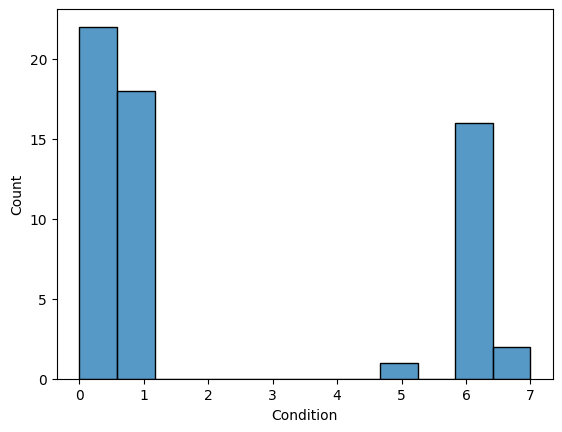

In [13]:
plt = seaborn.histplot(launches['Condition'],bins=12)
plt.plot()

In [14]:
y = launch_data['Launched?']
X = launch_data.drop(columns= ['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'])
X

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.00,0.08,0,16.0,15.0,0.0,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.00,0.09,0,14.0,10.0,0.0,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,2,15.0,10.0,11.0,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.00,0.08,1,10.0,10.0,0.0,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.00,0.09,0,12.0,10.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,87.0,71.0,79.36,0.0,87.0,70.0,79.0,0.00,0.15,4,20.0,10.0,0.0,9
296,1,86.0,72.0,79.50,0.0,88.0,70.0,79.0,0.01,0.16,5,18.0,10.0,0.0,1
297,0,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,5,16.0,10.0,7.0,1
298,1,87.0,72.0,79.70,0.0,88.0,70.0,79.0,0.46,0.16,0,13.0,10.0,0.0,0


In [15]:
decision_tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99,)

In [16]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [17]:
y_pred = decision_tree_model.predict(X_test)
y_hat = y_pred == y_test
y_hat.sum() / len(y_hat)

0.9833333333333333

In [18]:
decision_tree_model.score(X_test,y_test)

0.9833333333333333

In [19]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

In [20]:
tree_graph_to_png(decision_tree_model,X.columns.tolist(),['y','n'],'tree.png')

InvocationException: GraphViz's executables not found

In [21]:
data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]
decision_tree_model.predict([data_input])

c:\Users\karol\Documents\rocket-launch-delays\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)